In [1]:
import numpy as np
import sys
sys.path.append('..')
from nn import *
from tools import train_test_split, one_hot_encoder
from viz import plot_history

In [2]:
data = np.load('datasets/cifar10.npz')
X = data['arr_0']
y = data['arr_1']
X = X.astype(np.float32) / 255.
y, _ = one_hot_encoder(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [3]:
np.random.seed(42)
m = NeuralNetwork('crossentropy', optimizer=Adam(lr=0.01), verbose=True, verbose_step=1, debug=False)
m.add(Flatten())
# m.add(Dense(256, 'elu'))
# m.add(BatchNorm())
m.add(Dense(10, 'softmax', weights_regularizer=L2Regularizer(lamd=1)))
h = m.fit(X_train, y_train, X_test, y_test, n_epochs=6, batch_size=256, metrics=['accuracy'])


[    1/6]: loss=0.22613 val_loss=0.22623 accuracy=0.15755 val_accuracy=0.15600 



[    2/6]: loss=0.22267 val_loss=0.22277 accuracy=0.19035 val_accuracy=0.19456 



[    3/6]: loss=0.21968 val_loss=0.21977 accuracy=0.21325 val_accuracy=0.21584 



[    4/6]: loss=0.21710 val_loss=0.21716 accuracy=0.22661 val_accuracy=0.22960 



[    5/6]: loss=0.21484 val_loss=0.21487 accuracy=0.23600 val_accuracy=0.23856 



[    6/6]: loss=0.21285 val_loss=0.21285 accuracy=0.24341 val_accuracy=0.24824 



[    1/3]: loss=0.22865 val_loss=0.22860 accuracy=0.12107 val_accuracy=0.12168 



[    2/3]: loss=0.22261 val_loss=0.22248 accuracy=0.23925 val_accuracy=0.24720 



[    3/3]: loss=0.21125 val_loss=0.21100 accuracy=0.30757 val_accuracy=0.31320 


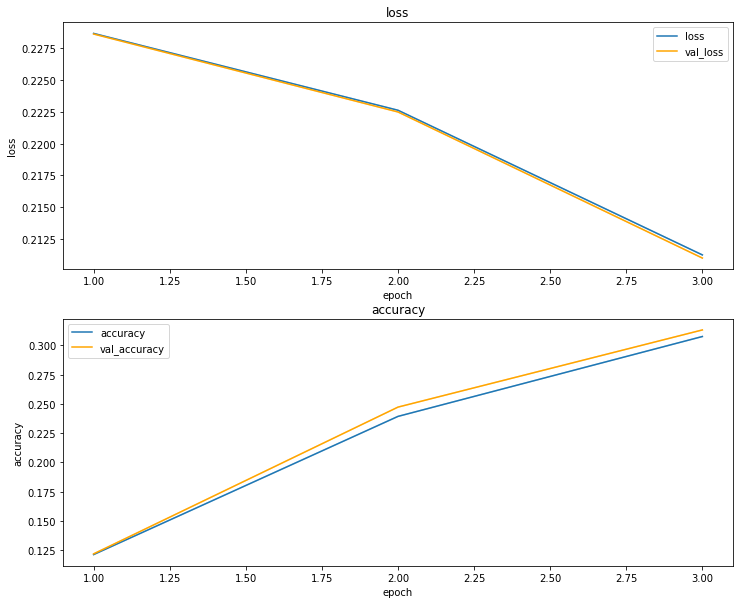

In [5]:
np.random.seed(42)
m = NeuralNetwork('crossentropy', optimizer=Adam(lr=0.05), verbose=True, verbose_step=1, debug=True)
m.add(Flatten())
m.add(Dense(256, 'elu'))
m.add(BatchNorm())
m.add(Dense(256, 'elu'))
m.add(BatchNorm())
m.add(Dense(10, 'softmax'))
h = m.fit(X_train, y_train, X_test, y_test, n_epochs=3, batch_size=512, metrics=['accuracy'])
plot_history(h)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Softmax, Flatten
from keras.optimizers import Adam

In [ ]:
km = Sequential([Flatten(), Dense(10), Softmax()])
km.compile('adam', 'categorical_crossentropy')
km.fit(X_train, y_train, batch_size=256)